In [650]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.mlab as mlab
%matplotlib inline

In [651]:
url = 'https://raw.githubusercontent.com/dphi-official/Datasets/master/pharma_data/Training_set_begs.csv'
pharma_data= pd.read_csv(url)

In [652]:
pharma_data.head()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year
0,22374,8,3333,DX6,56,18.479385,YES,URBAN,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0
1,18164,5,5740,DX2,36,22.945566,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
2,6283,23,10446,DX6,48,27.510027,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
3,5339,51,12011,DX1,5,19.130976,NO,URBAN,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
4,33012,0,12513,NaN,128,1.348400,Cannot say,RURAL,Stable,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1


In [653]:
pharma_data.isnull().sum()

ID_Patient_Care_Situation       0
Diagnosed_Condition             0
Patient_ID                      0
Treated_with_drugs             13
Patient_Age                     0
Patient_Body_Mass_Index         0
Patient_Smoker                  0
Patient_Rural_Urban             0
Patient_mental_condition        0
A                            1235
B                            1235
C                            1235
D                            1235
E                            1235
F                            1235
Z                            1235
Number_of_prev_cond          1235
Survived_1_year                 0
dtype: int64

In [654]:
pharma_data['A']= pharma_data['A'].fillna(pharma_data['A'].median())

In [655]:
pharma_data['B']= pharma_data['B'].fillna(pharma_data['B'].median())

In [656]:
pharma_data['C']= pharma_data['C'].fillna(pharma_data['C'].median())

In [657]:
pharma_data['D']= pharma_data['D'].fillna(pharma_data['D'].median())

In [658]:
pharma_data['E']= pharma_data['E'].fillna(pharma_data['E'].median())

In [659]:
pharma_data['F']= pharma_data['F'].fillna(pharma_data['F'].median())

In [660]:
pharma_data['Z']= pharma_data['Z'].fillna(pharma_data['Z'].median())

In [661]:
pharma_data['Number_of_prev_cond']= pharma_data['Number_of_prev_cond'].fillna(pharma_data['Number_of_prev_cond'].median())

In [662]:
pharma_data.describe()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Patient_Age,Patient_Body_Mass_Index,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year
count,23097.000000,23097.000000,23097.000000,23097.000000,23097.000000,23097.000000,23097.000000,23097.000000,23097.000000,23097.000000,23097.000000,23097.000000,23097.000000,23097.000000
mean,16545.712041,26.413127,6261.280772,33.209768,23.454820,0.903364,0.129064,0.175174,0.079144,0.372213,0.050829,0.000563,1.763822,0.632247
std,9532.263503,15.030865,3595.990620,19.549882,3.807661,0.295468,0.335278,0.380124,0.269970,0.483405,0.219653,0.023718,0.751533,0.482204
min,2.000000,0.000000,1.000000,0.000000,1.089300,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,8280.000000,13.000000,3181.000000,16.000000,20.205550,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,16597.000000,26.000000,6242.000000,33.000000,23.386199,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000
75%,24825.000000,39.000000,9363.000000,50.000000,26.788154,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,2.000000,1.000000
max,33014.000000,52.000000,12515.000000,149.000000,29.999579,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,1.000000


# EDA

In [663]:
pharma_data.Survived_1_year.value_counts()

1    14603
0     8494
Name: Survived_1_year, dtype: int64

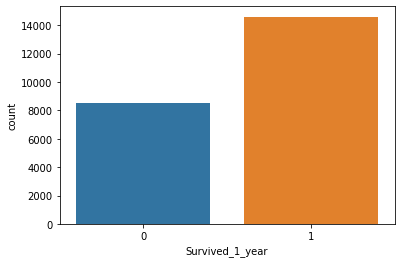

In [664]:
sns.countplot(x='Survived_1_year',data=pharma_data)

In [665]:
pharma_data.describe()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Patient_Age,Patient_Body_Mass_Index,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year
count,23097.000000,23097.000000,23097.000000,23097.000000,23097.000000,23097.000000,23097.000000,23097.000000,23097.000000,23097.000000,23097.000000,23097.000000,23097.000000,23097.000000
mean,16545.712041,26.413127,6261.280772,33.209768,23.454820,0.903364,0.129064,0.175174,0.079144,0.372213,0.050829,0.000563,1.763822,0.632247
std,9532.263503,15.030865,3595.990620,19.549882,3.807661,0.295468,0.335278,0.380124,0.269970,0.483405,0.219653,0.023718,0.751533,0.482204
min,2.000000,0.000000,1.000000,0.000000,1.089300,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,8280.000000,13.000000,3181.000000,16.000000,20.205550,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,16597.000000,26.000000,6242.000000,33.000000,23.386199,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000
75%,24825.000000,39.000000,9363.000000,50.000000,26.788154,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,2.000000,1.000000
max,33014.000000,52.000000,12515.000000,149.000000,29.999579,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,1.000000


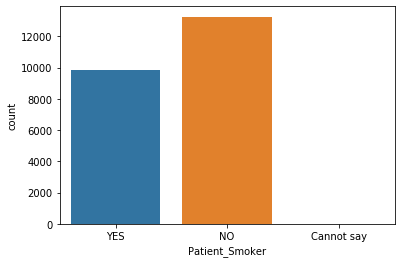

In [666]:
sns.countplot(x='Patient_Smoker',data=pharma_data)

In [667]:
pharma_data.Patient_Smoker.value_counts()

NO            13246
YES            9838
Cannot say       13
Name: Patient_Smoker, dtype: int64

In [668]:
pharma_data.Patient_Rural_Urban.value_counts()

RURAL    16134
URBAN     6963
Name: Patient_Rural_Urban, dtype: int64

In [669]:
cols = ['Patient_ID', 'Treated_with_drugs', 'Patient_mental_condition']
pharma_data = pharma_data.drop(cols, axis=1)

In [670]:
dummies = []

cols = ['Patient_Rural_Urban', 'Patient_Smoker']
for col in cols:
    dummies.append(pd.get_dummies(pharma_data[col]))
pharma_dummies = pd.concat(dummies, axis=1)

In [671]:
pharma_data = pd.concat((pharma_data,pharma_dummies), axis=1)

In [672]:
pharma_data = pharma_data.drop(['Patient_Rural_Urban', 'Patient_Smoker'], axis=1)

In [673]:
pharma_data = pharma_data.drop(['Cannot say'], axis=1)

In [674]:
pharma_data.head()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_Age,Patient_Body_Mass_Index,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year,RURAL,URBAN,NO,YES
0,22374,8,56,18.479385,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0,0,1,0,1
1,18164,5,36,22.945566,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,1,0,0,1
2,6283,23,48,27.510027,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,1,0,0,1
3,5339,51,5,19.130976,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0,1,1,0
4,33012,0,128,1.348400,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1,1,0,0,0


In [675]:
correlation = pharma_data.corr()
print(correlation['Survived_1_year'].sort_values(ascending = False),'\n')

Survived_1_year              1.000000
NO                           0.252765
RURAL                        0.112767
Z                            0.018099
E                            0.008466
F                            0.000304
Diagnosed_Condition         -0.004450
ID_Patient_Care_Situation   -0.004685
C                           -0.039701
A                           -0.043404
B                           -0.054560
Number_of_prev_cond         -0.074087
Patient_Age                 -0.074934
D                           -0.107677
URBAN                       -0.112767
Patient_Body_Mass_Index     -0.121844
YES                         -0.253676
Name: Survived_1_year, dtype: float64 



Index(['Survived_1_year', 'NO', 'RURAL', 'Z', 'E', 'F', 'Diagnosed_Condition',
       'ID_Patient_Care_Situation', 'C', 'A', 'B'],
      dtype='object')


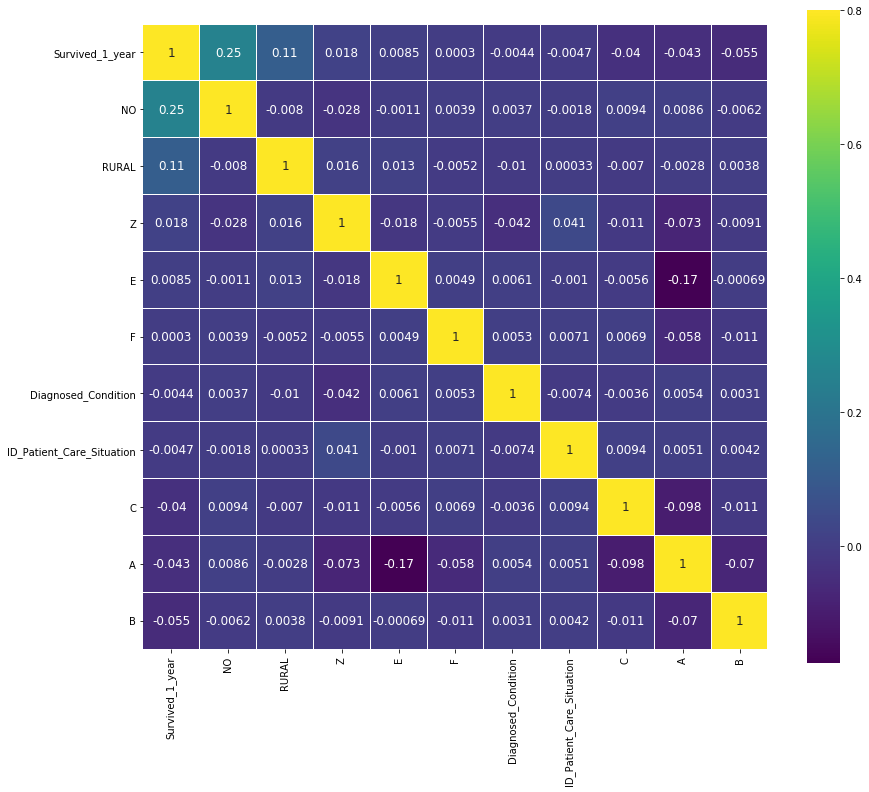

In [676]:
k= 11
cols = correlation.nlargest(k,'Survived_1_year')['Survived_1_year'].index
print(cols)
cm = np.corrcoef(pharma_data[cols].values.T)
f , ax = plt.subplots(figsize = (14,12))
sns.heatmap(cm, vmax=.8, linewidths=0.01,square=True,annot=True,cmap='viridis',
            linecolor="white",xticklabels = cols.values ,annot_kws = {'size':12},yticklabels = cols.values)

# Splitting test train data

In [677]:
x = pharma_data.drop('Survived_1_year', axis=1)
y = pharma_data.Survived_1_year

In [678]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=42)

In [679]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
logreg.fit(x_train,y_train)
y_pred=logreg.predict(x_test)

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


# Logistic Regression

In [680]:
import sklearn
sklearn.metrics.accuracy_score(y_test,y_pred)

0.6734881280335826

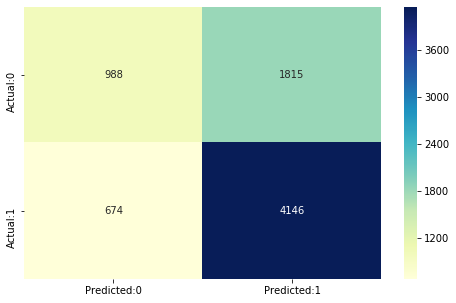

In [681]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [682]:
TN=cm[0,0]
TP=cm[1,1]
FN=cm[1,0]
FP=cm[0,1]
sensitivity=TP/float(TP+FN)
specificity=TN/float(TN+FP)

In [683]:
print('The acuuracy of the model = TP+TN/(TP+TN+FP+FN) = ',(TP+TN)/float(TP+TN+FP+FN),'\n',

'The Missclassification = 1-Accuracy = ',1-((TP+TN)/float(TP+TN+FP+FN)),'\n',

'Sensitivity or True Positive Rate = TP/(TP+FN) = ',TP/float(TP+FN),'\n',

'Specificity or True Negative Rate = TN/(TN+FP) = ',TN/float(TN+FP),'\n',

'Positive Predictive value = TP/(TP+FP) = ',TP/float(TP+FP),'\n',

'Negative predictive Value = TN/(TN+FN) = ',TN/float(TN+FN),'\n',

'Positive Likelihood Ratio = Sensitivity/(1-Specificity) = ',sensitivity/(1-specificity),'\n',

'Negative likelihood Ratio = (1-Sensitivity)/Specificity = ',(1-sensitivity)/specificity)


The acuuracy of the model = TP+TN/(TP+TN+FP+FN) =  0.6734881280335826 
 The Missclassification = 1-Accuracy =  0.3265118719664174 
 Sensitivity or True Positive Rate = TP/(TP+FN) =  0.8601659751037345 
 Specificity or True Negative Rate = TN/(TN+FP) =  0.35247948626471637 
 Positive Predictive value = TP/(TP+FP) =  0.6955208857574232 
 Negative predictive Value = TN/(TN+FN) =  0.5944645006016848 
 Positive Likelihood Ratio = Sensitivity/(1-Specificity) =  1.3283995747745276 
 Negative likelihood Ratio = (1-Sensitivity)/Specificity =  0.3967153560569152


In [684]:
sklearn.metrics.f1_score(y_test, y_pred)

0.7691308783971803

# Decision Tree

In [621]:
from sklearn.tree import DecisionTreeClassifier

# Create Decision Tree regressor object
clf = DecisionTreeClassifier(random_state=1)

# Train Decision Tree Classifer
clf = clf.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(x_test)

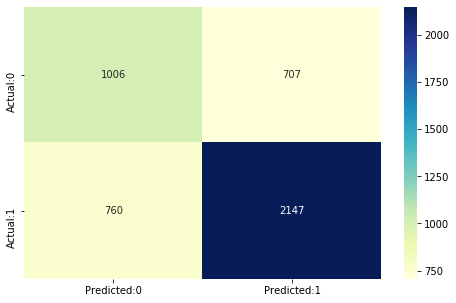

In [622]:
cm=confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [623]:
sklearn.metrics.accuracy_score(y_test,y_pred)

0.6824675324675324

In [624]:
sklearn.metrics.f1_score(y_test, y_pred)

0.7453567089047041

# Random Forest

In [685]:
from sklearn.ensemble import RandomForestClassifier

In [686]:
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

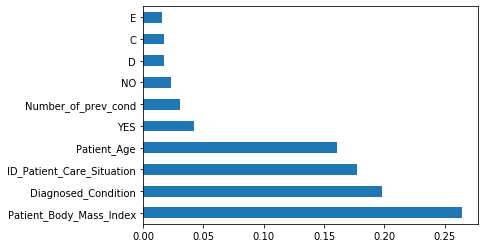

In [687]:
y_pred = rfc.predict(x_test)

feat_importances = pd.Series(rfc.feature_importances_, index=x_train.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

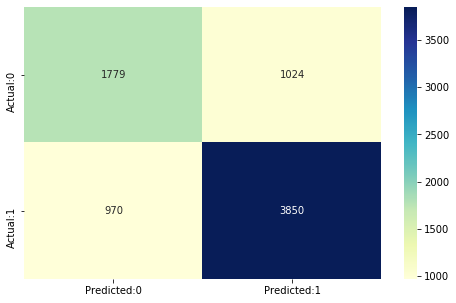

In [688]:
cm=confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [689]:
sklearn.metrics.accuracy_score(y_test,y_pred)

0.7384231929686476

In [690]:
sklearn.metrics.f1_score(y_test, y_pred)

0.7943057561378173

# Feature selection

In [631]:
from sklearn.feature_selection import RFE #importing RFE class from sklearn library

rfe = RFE(estimator= rfc , step = 1) 
# estimator clf_lr is the baseline model (basic model) that we have created under "Base line Model" selection
# step = 1: removes one feature at a time and then builds a model on the remaining features
# It uses the model accuracy to identify which features (and combination of features) contribute the most to predicting the target variable.
# we can even provide no. of features as an argument 

# Fit the function for ranking the features
fit = rfe.fit(x_train, y_train)

print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)

Num Features: 8
Selected Features: [ True  True  True  True False False False False False False False  True
  True False  True  True]
Feature Ranking: [1 1 1 1 7 5 4 2 3 8 9 1 1 6 1 1]


In [632]:
selected_rfe_features = pd.DataFrame({'Feature':list(x_train.columns),
                                      'Ranking':rfe.ranking_})
selected_rfe_features.sort_values(by='Ranking')

,Feature,Ranking
0,ID_Patient_Care_Situation,1
1,Diagnosed_Condition,1
2,Patient_Age,1
3,Patient_Body_Mass_Index,1
11,Number_of_prev_cond,1
12,RURAL,1
14,NO,1
15,YES,1
7,D,2
8,E,3


In [706]:
parameter = {
            'n_estimators': [ ], 
              'max_features': [], 
              'criterion': [],
              'max_depth': [] ,
              'min_samples_split': [ ],
              'min_samples_leaf': [ ] 
           }

In [717]:
def gridfunc(classifier, parameter, x_train, y_train):
        
    clf = classifier
    np.random.seed(9)
    parameters = parameter
    acc_scorer = make_scorer(accuracy_score)
    
    # Run the grid search
    grid_obj = GridSearchCV(clf, parameters, scoring=acc_scorer, return_train_score=True)
    grid_obj = grid_obj.fit(x_train, y_train) 
    
    return grid_obj

In [708]:
def hp_cv_scores(grid_obj):
    grid_obj.cv_results_  #A dictionary with keys as column title and values as columns
    mean_test_scores = grid_obj.cv_results_['mean_test_score'] #Adding 'mean_test_score' as a key
    mean_train_scores = grid_obj.cv_results_['mean_train_score'] #Adding 'mean_train_score' as a key
    
    plt.figure(figsize=(10,6))
    
    # the below lines just fill up the column using the various parameter values we want to try
    all_vals = list(grid_obj.param_grid.values())
    param_values =[str(x) for x in all_vals[0]]
    
    # The below line creates values for ticks on x axis. If there are 2 parameter values to be tried, it'll create 2 ticks
    x = np.arange(1, len(param_values)+1)
     
    plt.plot(x,mean_train_scores, c='r', label='Train set') #Plotting the mean_train_scores in red
    
    plt.xticks(x,param_values)
    
    plt.plot(x,mean_test_scores,c='g', label='Test set') #Plotting the mean_test_scores in red
    plt.xlabel(list(grid_obj.param_grid.keys())[0]) #Label of the column will be the hyperparameter
    plt.ylabel('mean scores')
    plt.legend()
    plt.show()

In [709]:
classifier = RandomForestClassifier(random_state=9)

In [723]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score, roc_auc_score, make_scorer

import warnings
warnings.filterwarnings('ignore')

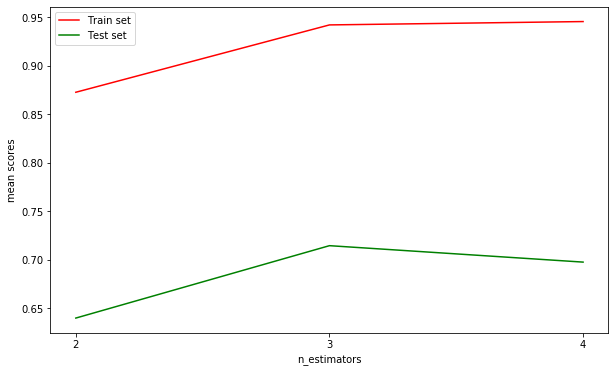

In [724]:
# plotting the graph using created function to find the variation in model for given n_estimators -- NEEDS LEGEND

grid = gridfunc(classifier,{'n_estimators': [2, 3, 4]} , x_train, y_train)
hp_cv_scores(grid)

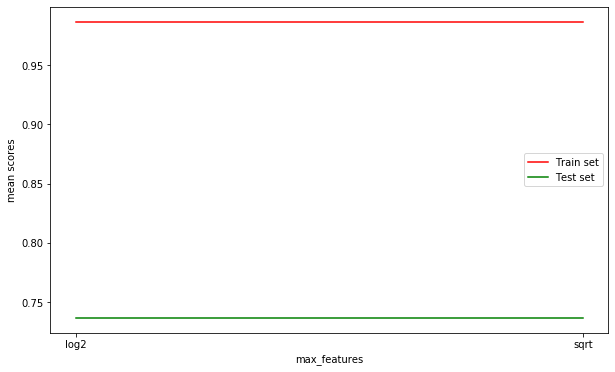

In [725]:
# plotting the graph to find the variation in model for given max features

grid = gridfunc(classifier,{'max_features': ['log2', 'sqrt']} , x_train, y_train)
hp_cv_scores(grid)

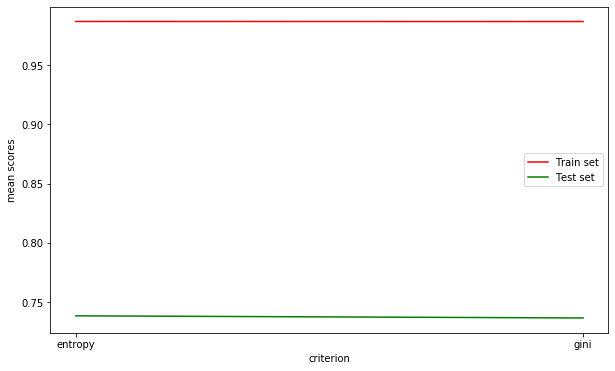

In [726]:
# plotting the graph to find the variation in model for given criterion

grid = gridfunc(classifier,{'criterion': ['entropy', 'gini']} , x_train, y_train)
hp_cv_scores(grid)

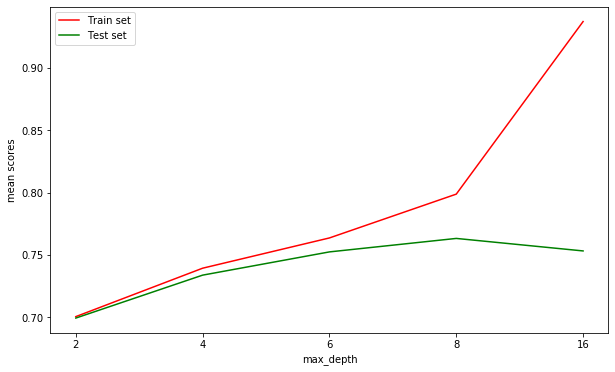

In [727]:
# plotting the graph to find the variation in model for given max depth

grid = gridfunc(classifier,{'max_depth': [2,4,6,8,16]} , x_train, y_train)
hp_cv_scores(grid)

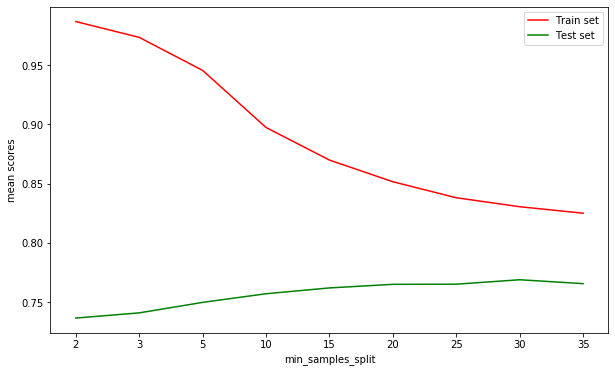

In [728]:
# plotting the graph to find the variation in model for given min samples split

grid = gridfunc(classifier,{'min_samples_split': [2, 3, 5, 10, 15,20,25,30,35]} , x_train, y_train)
hp_cv_scores(grid)

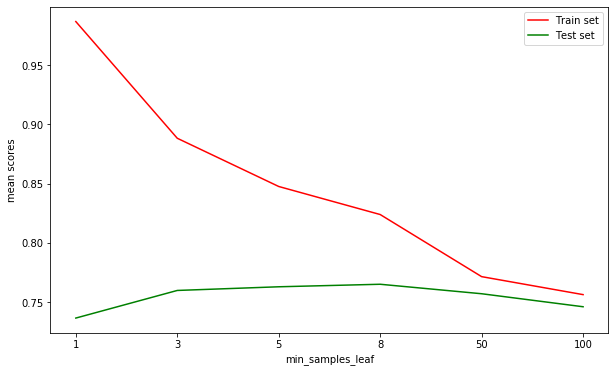

In [729]:
# plotting the graph to find the variation in model for given min samples leaf

grid = gridfunc(classifier,{'min_samples_leaf': [1,3,5,8,50,100]} , x_train, y_train)
hp_cv_scores(grid)

In [730]:
classifier = RandomForestClassifier(random_state=9)
parameter = {'n_estimators': [10,50,100], 
              'max_features': ['log2', 'sqrt'], 
              'criterion': ['entropy', 'gini'],
              'max_depth': [2,4,6], 
              'min_samples_split': [2, 3, 5],
              'min_samples_leaf': [1,3,5]
             }

In [731]:
#task find the results for the given params
grid = gridfunc(classifier, parameter, x_train, y_train)

In [732]:
# Set the clf to the best combination of parameters
clf = grid.best_estimator_
    
# Fit the best algorithm to the data. 
clf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=6, max_features='log2', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=9, verbose=0,
                       warm_start=False)

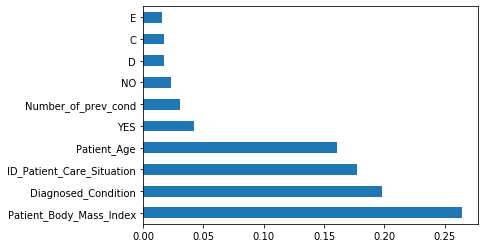

In [733]:
y_pred = clf.predict(x_test)

feat_importances = pd.Series(rfc.feature_importances_, index=x_train.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [734]:
sklearn.metrics.f1_score(y_test, y_pred)

0.8295612009237875

# XGBoost


Feature Importances :  [0.01851116 0.04261196 0.03152002 0.03971554 0.03757512 0.05051104
 0.03846428 0.08102936 0.01646645 0.02296581 0.         0.02457738
 0.08338779 0.         0.19139107 0.32127306]


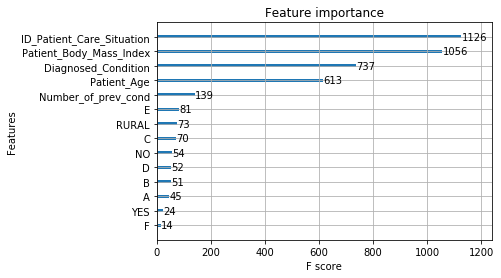

In [691]:
from xgboost import XGBClassifier
from xgboost import plot_importance

# fit model to training data
xgb_model = XGBClassifier(random_state = 0 )
xgb_model.fit(x_train, y_train)

print("Feature Importances : ", xgb_model.feature_importances_)

# plot feature importance
plot_importance(xgb_model)
plt.show()

In [692]:
selection = SelectFromModel(xgb_model)
selection.fit(x_train, y_train)

# Transform the train and test features
select_X_train = selection.transform(x_train)
select_X_test = selection.transform(x_test) 

# train model
selection_model = XGBClassifier()
selection_model.fit(select_X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [693]:
y_pred = xgb_model.predict(x_test)

xgb_ac = accuracy_score(y_test, y_pred)
xgb_fscore = f1_score(y_test ,y_pred)

print("XGB Baseline Model Accuracy:", xgb_ac)
print("XGB Baseline Model F1 Score:", xgb_fscore)

XGB Baseline Model Accuracy: 0.7727928637019547
XGB Baseline Model F1 Score: 0.8280381254964257


# Taking the test dataset

In [694]:
test_new = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/pharma_data/Testing_set_begs.csv')

In [695]:
test_new.head()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond
0,19150,40,3709,DX3,16,29.443894,NO,RURAL,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0
1,23216,52,986,DX6,24,26.836321,NO,URBAN,Stable,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0
2,11890,50,11821,DX4 DX5,63,25.523280,NO,RURAL,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0
3,7149,32,3292,DX6,42,27.171155,NO,URBAN,Stable,1.0,0.0,1.0,0.0,1.0,0.0,0.0,3.0
4,22845,20,9959,DX3,50,25.556192,NO,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [696]:
cols = ['Patient_ID', 'Treated_with_drugs', 'Patient_mental_condition']
test_new = test_new.drop(cols, axis=1)

In [697]:
dummies = []

cols = ['Patient_Rural_Urban', 'Patient_Smoker']
for col in cols:
    dummies.append(pd.get_dummies(test_new[col]))
test_dummies = pd.concat(dummies, axis=1)

In [698]:
test_new = pd.concat((test_new,test_dummies), axis=1)

In [699]:
test_new = test_new.drop(['Patient_Rural_Urban', 'Patient_Smoker'], axis=1)

In [700]:
test_new.head()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_Age,Patient_Body_Mass_Index,A,B,C,D,E,F,Z,Number_of_prev_cond,RURAL,URBAN,NO,YES
0,19150,40,16,29.443894,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1,0,1,0
1,23216,52,24,26.836321,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0,1,1,0
2,11890,50,63,25.523280,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1,0,1,0
3,7149,32,42,27.171155,1.0,0.0,1.0,0.0,1.0,0.0,0.0,3.0,0,1,1,0
4,22845,20,50,25.556192,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0,1,0


In [643]:
#x is X_train and y is Y_train and applying Random forest.

rfc = RandomForestClassifier()
rfc.fit(x, y)

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [644]:
y_pred1 = rfc.predict(test_new)

In [645]:
Survived_1_year = y_pred1

In [449]:
Survived_1_year

array([0, 1, 1, ..., 1, 0, 1], dtype=int64)

In [ ]:
res = pd.DataFrame(Survived_1_year) #preditcions are nothing but the final predictions of your model on input features of your new unseen test data
res.index = test_new.index # its important for comparison. Here "test_new" is your new test dataset
res.columns = ["prediction"]
res.to_csv(r"C:\Users\HP\Desktop\Dphi\Final Assignment\prediction_results_HP.csv")

In [735]:
#task find the results for the given params
grid = gridfunc(classifier, parameter, x, y)

In [736]:
# Set the clf to the best combination of parameters
clf = grid.best_estimator_
    
# Fit the best algorithm to the data. 
clf.fit(x, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=6, max_features='log2', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=9, verbose=0,
                       warm_start=False)

In [737]:
Survived_1_year = clf.predict(test_new)

In [738]:
res = pd.DataFrame(Survived_1_year) #preditcions are nothing but the final predictions of your model on input features of your new unseen test data
res.index = test_new.index # its important for comparison. Here "test_new" is your new test dataset
res.columns = ["prediction"]
res.to_csv(r"C:\Users\HP\Desktop\Dphi\Final Assignment\a_prediction_results_HP.csv") 

# XGBoost

Feature Importances :  [0.01621051 0.04324719 0.03122553 0.04017736 0.03591002 0.03104739
 0.05619692 0.0912392  0.01640338 0.02922633 0.         0.02574459
 0.09031542 0.         0.15213531 0.34092084]


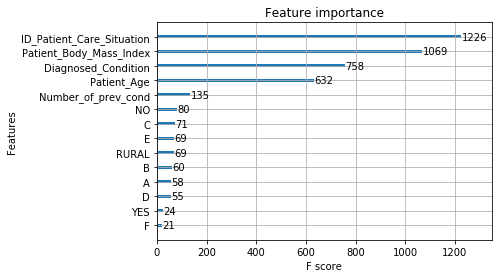

In [701]:
# fit model to training data
xgb_model = XGBClassifier(random_state = 0 )
xgb_model.fit(x, y)

print("Feature Importances : ", xgb_model.feature_importances_)

# plot feature importance
plot_importance(xgb_model)
plt.show()

In [702]:
selection = SelectFromModel(xgb_model)
selection.fit(x, y)

# Transform the train and test features
select_X_train = selection.transform(x)
select_X_test = selection.transform(test_new) 

# train model
selection_model = XGBClassifier()
selection_model.fit(select_X_train, y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [703]:
Survived_1_year = xgb_model.predict(test_new)

In [704]:
res = pd.DataFrame(Survived_1_year) #preditcions are nothing but the final predictions of your model on input features of your new unseen test data
res.index = test_new.index # its important for comparison. Here "test_new" is your new test dataset
res.columns = ["prediction"]
res.to_csv(r"C:\Users\HP\Desktop\Dphi\Final Assignment\new_prediction_results_HP.csv")